# Final practical example:


### What we know so far:
- all librarians are data scientists
- coding in python isn't that much different from working with a spreadsheet
- we know how to create text data and numerical data, and store it in a string, 
- we know how to store data in lists, as well as access one item in the list, or a *slice* of items
- we can recite the 3 pet peeves of python
- we know how to store data in dictionaries, and access them via their keys

### What we will learn now:
- We will learn how to use two really nifty python libraries to help us with turning a csv in to dublin core xml
- We will practice planning a coding script
- we will use our knowledge to create a jupyter notebook to do this

## The task- Turn a spreadsheet of metadata into dublin core

Any good coding project starts out with some pseudo code to think about what to write before you write it, think of it like outlining a paper

### Example pseudo code
Write in order the things you need your code to run:

**Step 0:** Upload the libraries you need to run your script

**Step 1:** Upload data/ metadata

**Step 2:** Preprocess data/ metadata... this could be multiple steps

**Step 3:** Create the desired output (a csv, a graph, a map, an xml file etc...)

### Group discussion: Write specific pseudocode for our exercise

### Step 1: Some help with opening a csv, introducing the special powers of pandas?:

We first need to upload data from a csv into Python, in order to do that we will use one of the most powerful packages used in Python called, **Pandas**, which is the go to package for working with spreadsheet/tabular "tidy" data.

In [1]:
import pandas as pd


# this file is in the same folder as the notebook
df = pd.read_csv("example_data/iris.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Sidebar:** How does python know where that csv is? Every running python kernel has a a folder in your computer that it is working in (this can be changed using the command os.chdir() but we won't need that here. When you open up and start a jupyter notebook, the kernel starts running in the folder it is working then. In that case, you can open up a csv in the same folder by just using a string of the file name in pd.read_csv, or use a relative path (like the example above)

You can really just think of a pandas "dataframe" as a dictionary, full of lists (actually numpy arrays but don't worry about that right now!)

In [3]:
# pull out one of the columns
type(df) # what did we make here?
df['sepal_length'][3]

4.6

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

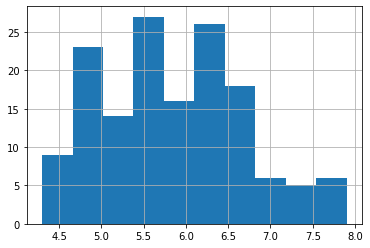

In [6]:
df['sepal_length'].hist()

In fact, you can even turn it into a dictionary full of lists

In [7]:
from jgarber_respitch.workshop_tools import convert_df_row_to_dictionary

help(convert_df_row_to_dictionary)

Help on function convert_df_row_to_dictionary in module jgarber_respitch.workshop_tools:

convert_df_row_to_dictionary(df: pandas.core.frame.DataFrame, row_number: int)
    converts the row of a dataframe to a dictionary
    of lists
    
    :param df: input dataframe
    :type df: pd.DataFrame
    :param row_number: row to convert into a dictionary
    
    :return: dictionary of the values, where keys are the column names, and the values are lists of the values
    :rtype: dictionary



In [8]:
convert_df_row_to_dictionary(df,1)

{'sepal_length': [4.9],
 'sepal_width': [3.0],
 'petal_length': [1.4],
 'petal_width': [0.2],
 'species': ['setosa']}

### Data frames have attributes as well as methods:

Attributes are kind of like variables that are stored within the object, and are accessed kind of like a method but without the `()`.

In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
df.shape

(150, 5)

### Exercise 5.1 open your first csv:
1. open the mild_DC_dataset.csv in the exercise_data folder
2. find out what column names the dataset has
3. take a look at the top five rows of the dataset (bonus points for looking at the bottom 5 rows)
4. find out how big the dataset is

In [12]:
# upload the dataset in exercise_data/mild_DC_dataset.csv
newdf = pd.read_csv("exercise_data/mild_DC_dataset.csv")



In [13]:
# print out the columns of the dataset
newdf.columns

Index(['titles', 'descriptions', 'creators', 'types', 'rights', 'formats',
       'dates'],
      dtype='object')

In [15]:
# print out the top five rows of the dataset
newdf.head()


,titles,descriptions,creators,types,rights,formats,dates
0,"Doug Smith and Liz, John Knox Church.",Portraits of Doug and Liz Smith and two boys.,"Diaz, Maggie,1925-2016, photographer.",StillImage,This work is in copyright.,TIFF,1970/1979
1,"Charm class, Lower North Centre, Chicago, Unit...",Portrait photographs of young African American...,"Diaz, Maggie,1925-2016, photographer.",StillImage,This work is in copyright.,TIFF,1953/1961
2,"Charm class, Lower North Centre, Chicago, Unit...",Portrait photographs of young African American...,"Diaz, Maggie,1925-2016, photographer.",StillImage,This work is in copyright.,TIFF,1953/1961
3,Wedding of Vivian Jarny [or Garny?].,"Includes bride and groom, attendants and guest...","Diaz, Maggie,1925-2016, photographer.",StillImage,This work is in copyright.,TIFF,1980/1989
4,"Performance with maritime theme at La Mama, di...",Includes other images of same actors in differ...,"Diaz, Maggie,1925-2016, photographer.",StillImage,This work is in copyright.,TIFF,1990/1999


In [ ]:
# find out how big the dataset is

### Step -1: Outputing an xml file:

I said at the beginning that usually you have to create your own special powers by writing your own code to do what you want, but this time I am wrong. Luckily some really clever people have already written a package to create Simple Dublin Core xml files called dcxml:

In [16]:
from dcxml import simpledc

All you need to do is feed it a dictionary with these ***specific*** keys:

In [18]:
data = {
        'contributors' : ['CERN'],
        'coverage' : ['Geneva'],
        'creators' : ['CERN'],
        'dates' : ['2002'],
        'descriptions' : ['Simple Dublin Core generation'],
        'formats' : ['application/xml'],
#         'identifiers' : ['dublin-core'],
#         'languages' : ['en'],
        'publishers' : ['CERN'],
        'relations' : ['Invenio Software'],
        'rights' : ['MIT'],
        'sources' : ['Python'],
        'subject' : ['XML'],
        'titles' : ['Dublin Core XML'],
        'types' : ['Software'],
         'extra': ['extra']
       }

xml = simpledc.tostring(data)
print(xml)

<?xml version='1.0' encoding='utf-8'?>
<oai_dc:dc xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:oai_dc="http://www.openarchives.org/OAI/2.0/oai_dc/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/oai_dc/ http://www.openarchives.org/OAI/2.0/oai_dc.xsd">
  <dc:contributor>CERN</dc:contributor>
  <dc:coverage>Geneva</dc:coverage>
  <dc:creator>CERN</dc:creator>
  <dc:date>2002</dc:date>
  <dc:description>Simple Dublin Core generation</dc:description>
  <dc:format>application/xml</dc:format>
  <dc:publisher>CERN</dc:publisher>
  <dc:relation>Invenio Software</dc:relation>
  <dc:rights>MIT</dc:rights>
  <dc:source>Python</dc:source>
  <dc:title>Dublin Core XML</dc:title>
  <dc:type>Software</dc:type>
</oai_dc:dc>



### Exercise: Have a go with this library
What happens when you don't have all the metadata fields listed as dictionary keys in data above? will it still create an xml?

### Final Project Part one: Turn the easy_DC_dataset , row number 5, into xml:
1. Update the pseudocode for this project now that we have our two magic powers, Pandas and dcxml (we will do this together)
2. write a script to turn the dataframe into xml formatted string

In [22]:
row_as_dictionary = convert_df_row_to_dictionary(newdf,1)
row_as_dictionary

{'titles': ['Charm class, Lower North Centre, Chicago, United States.'],
 'descriptions': ["Portrait photographs of young African American women, standing, seated, posed looking out of window, profiles, standing in front of a blackboard, includes young girls, one in a party frock; Also shows them in a group in 'classes'; putting on makeup."],
 'creators': ['Diaz, Maggie,1925-2016, photographer.'],
 'types': ['StillImage'],
 'rights': ['This work is in copyright.'],
 'formats': ['TIFF'],
 'dates': ['1953/1961']}

In [24]:
print(simpledc.tostring(row_as_dictionary))

<?xml version='1.0' encoding='utf-8'?>
<oai_dc:dc xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:oai_dc="http://www.openarchives.org/OAI/2.0/oai_dc/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openarchives.org/OAI/2.0/oai_dc/ http://www.openarchives.org/OAI/2.0/oai_dc.xsd">
  <dc:creator>Diaz, Maggie,1925-2016, photographer.</dc:creator>
  <dc:date>1953/1961</dc:date>
  <dc:description>Portrait photographs of young African American women, standing, seated, posed looking out of window, profiles, standing in front of a blackboard, includes young girls, one in a party frock; Also shows them in a group in 'classes'; putting on makeup.</dc:description>
  <dc:format>TIFF</dc:format>
  <dc:rights>This work is in copyright.</dc:rights>
  <dc:title>Charm class, Lower North Centre, Chicago, United States.</dc:title>
  <dc:type>StillImage</dc:type>
</oai_dc:dc>



### Extra Credit Exercises: Turn the medium_DC_dataset.csv, row number 10, into xml

This one you may have to double check to see if the column names are right, if they aren't then check out the [dataframe.rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) method, and perhaps check the dictionary we created in part 4 as a help....

### Homework, getting Loopy!

It's pretty annoying to go through each row one at a time right? We totally agree! Thats why all languages have loops, which allows one to repeat code for a specified or calculated number of times. One can use a `for` loop, to repeat code ***for*** as many times as specified when the loop is created.

Please check out my youtube video on the subject:

https://youtu.be/-NM7jO_QXa0

These things are often done with a range, which is a way to make a python object that gives you all the integers within a given range

In [ ]:
for number in range(1,10):
    print(number) # is the number 10 printed?

now that we can create a range of integers, what if we also used those integers to go through every row of a our dataframe, and convert it into an xml? give that a go:

# CONGRATULATIONS FOR REACHING THE END

And thus begins the start of your journey into the world of Python. The coming weeks and months are going to be frustrating - you know that you *can* do something, but you *just can't quite* remember how it's done. Or maybe you need to keep looking up the simple things. And general syntax is going to be horrendous to remember.

![image.png](https://github.com/sailngarbwm/VALA-Tech-camp-2021-Intro-to-Python/raw/main/Imbedded%20Pics/end_cartoon.png)

### What we have learned
- All librarians are data scientists
- Coding is not that much different than doing things in excel, it is in the end easier to read, and has way way way more capabilities
- we learned about the types of data, and using functions and methods
- we can recite the 3 pet peeves of python
- we can store and use data and other python objects in lists and dictionaries
- We can use pandas to bring csv data into python, and manipulate that data
- We can use dcxml to create Dublin Core files
- we are ready to continue the lifelong learning journey into coding with python